In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Create a model

In [2]:
# class 1
x1 = np.random.normal(25, 5, 1000)
y1 = np.random.normal(25, 5, 1000)

# class 2
x2 = np.random.normal(55, 5, 1000)
y2 = np.random.normal(60, 5, 1000)

# class 3
x3 = np.random.normal(55, 5, 1000)
y3 = np.random.normal(15, 5, 1000)

X = np.concatenate((x1, x2, x3), axis = 0)
Y = np.concatenate((y1, y2, y3), axis = 0)

In [3]:
dictionary = {"x":X, "y":Y}
data = pd.DataFrame(dictionary)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


## Visualization

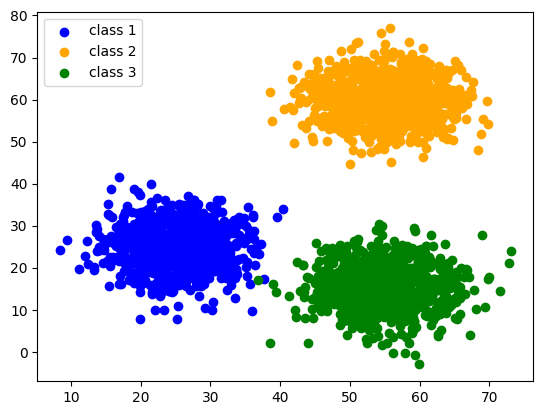

In [6]:
plt.scatter(x1, y1, color = "blue", label = "class 1")
plt.scatter(x2, y2, color = "orange", label = "class 2")
plt.scatter(x3, y3, color = "green", label = "class 3")
plt.legend()
plt.show()

## K-Means Clustering Algorithm

C:\Users\ardau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ardau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ardau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

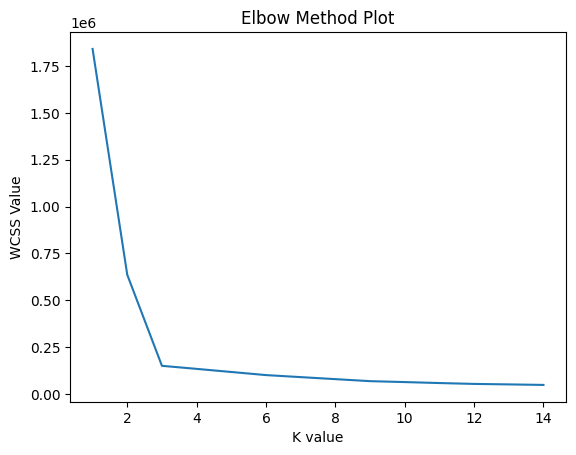

In [8]:
from sklearn.cluster import KMeans

wcss = [] # within cluster sum of squares values

#Elbow method
for each in range(1, 15):

    kmeans = KMeans(n_clusters = each)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS Value")
plt.title("Elbow Method Plot")
plt.show()

C:\Users\ardau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


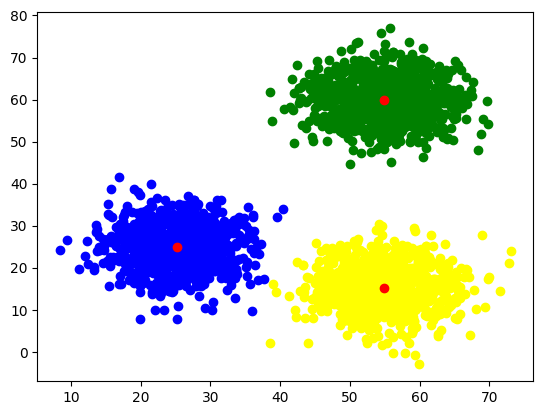

In [9]:
# According to Elbow method, let us choose K = 3
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(data)

# add cluster labels to the data
data["label"] = clusters

# visualize labeled data
plt.scatter(data.x[data["label"] == 0], data.y[data["label"] == 0], color = "yellow")
plt.scatter(data.x[data["label"] == 1], data.y[data["label"] == 1], color = "green")
plt.scatter(data.x[data["label"] == 2], data.y[data["label"] == 2], color = "blue")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red") # centroids
plt.show()